In [3]:
using Plots
using LinearAlgebra
using MatrixDepot
using Revise 
# my own modules start below...
# (put them AFTER the "using Revise")
using HeatSolver

# 1D time-varying heat equation on a finite bar

In [130]:
α = 0.05 # thermal diffusivity (m^2/s)
t_0 = 0.0 
t_final = 1.0
f_0 = λ -> sin(2π*λ) 
L = 1
N = 100 # number of interior points
domain = LinRange(0, L, N+2) # domain includes endpoints
domain_interior = domain[2:N+1]
u_0 = f_0.(domain_interior); # we don't feed the endpoints to the solver

In [131]:
# solver assumes that field value at endpoints is 0
u_T = bar1D(α, L, N, u_0, t_0, t_final, HeatSolver.FinDiff);

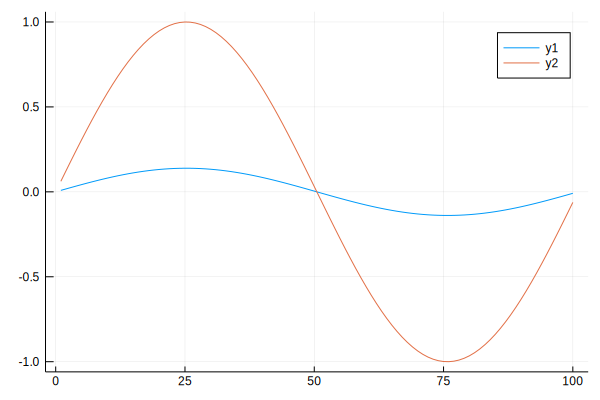

In [132]:
plot(u_T[end])
plot!(u_0)

In [133]:
h = L/(N+1)

0.009900990099009901

In [134]:
domain[2] - domain[1]

0.009900990099009901

In [135]:
A = (1.0/h^2)*matrixdepot("tridiag",N);

In [136]:
cond(Matrix(matrixdepot("tridiag",N)))

4133.64292680158

In [137]:
cond(Matrix(A))

4133.642926801247

In [138]:
A_inv = inv(A);

From Handout 2 of CS6220, the sum of the elements of any row of $A^{-1}$ should be greater than or equal to 0, and less than or equal to $\frac{1}{8}$

In [139]:
maximum([sum(A_inv[i,:]) for i in 1:N])

0.12498774629938275

In [140]:
minimum([sum(A_inv[i,:]) for i in 1:N])

0.004901480247034614

The peak magnitude of the second derivative of the intial distribution $u_0$ should be $4\pi^2$, assuming that $u_0 = \sin(2\pi x)$ and applying the chain rule.

In [141]:
maximum(-A*u_0)

39.46091442884972

In [142]:
4*pi^2

39.47841760435743